Aykırı Değer Sayıları:
Age: 0 aykırı değer
Num_Interactions: 0 aykırı değer
Feedback_Score: 0 aykırı değer
Products_Purchased: 0 aykırı değer
Products_Viewed: 0 aykırı değer
Time_Spent_on_Site: 0 aykırı değer
Satisfaction_Score: 0 aykırı değer
Gender_Encoded: 0 aykırı değer
Location_Encoded: 0 aykırı değer
Retention_Status_Encoded: 0 aykırı değer


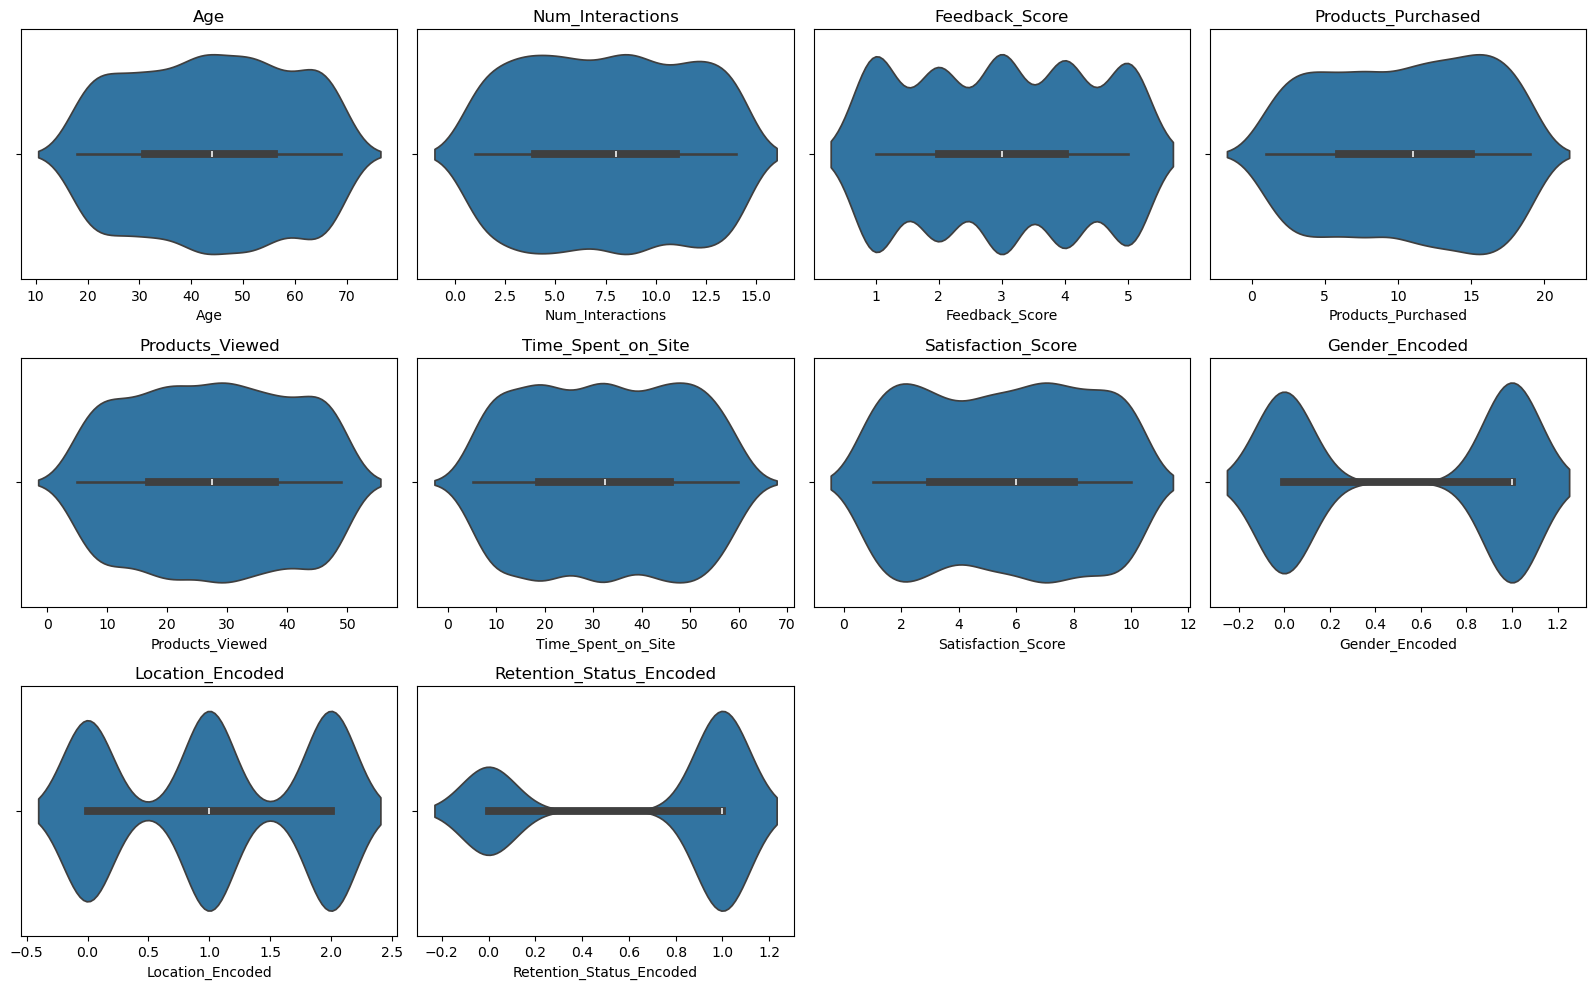

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("customer_experience_data.csv")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_columns.remove("Customer_ID")

# IQR yöntemiyle aykırı değer tespiti fonksiyonu
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

# Her sütundaki aykırı değer sayısı
print("Aykırı Değer Sayıları:")
for col in numerical_columns:
    count = detect_outliers_iqr(df, col)
    print(f"{col}: {count} aykırı değer")

# Görselleştirme
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.violinplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

